<a href="https://colab.research.google.com/github/kous6942/Titanic_IntroToML/blob/main/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# program to predict whether a passenger on the titanic would survive or not


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
titanic = sns.load_dataset('titanic')

#printing the first 12 rows of the data
titanic.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [ ]:
# counting the number of rows and columns
titanic.shape

# from the output we can see that there are 891 rows and 15 columns

(891, 15)

In [ ]:

# understanding the size of the dataset
titanic.size

# from the output we understand that there are 13365 elements in total

13365

In [ ]:
# getting some statistics of the dataset
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# the average survival rate is 0.38
# on an average the people chose 2nd class for their travel
# the average age of a passenger was 29.6 years of age
# average fare for ticket: 32 pounds where the min was 0 and max was 512 pounds

In [ ]:
# finding out the number of people who survived
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

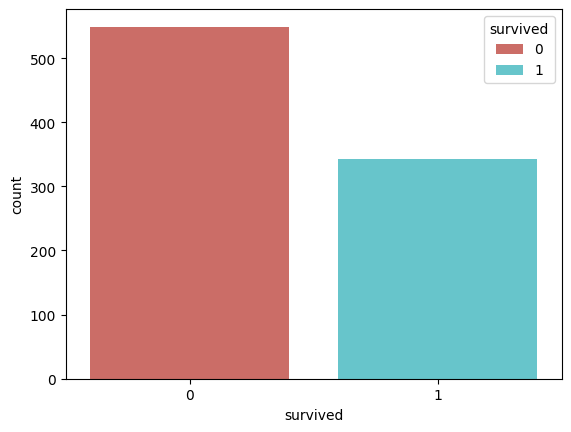

In [ ]:
# creating a barplot for visualizing survival
sns.countplot(x='survived', data = titanic, hue = 'survived', palette = 'hls')

In [ ]:
# 0 or the bar in red is bar plot of those who did not survive
# 1 or the blue bar is the bar plot for the people who did survive
# we can see that more number of people did not survive than those who did

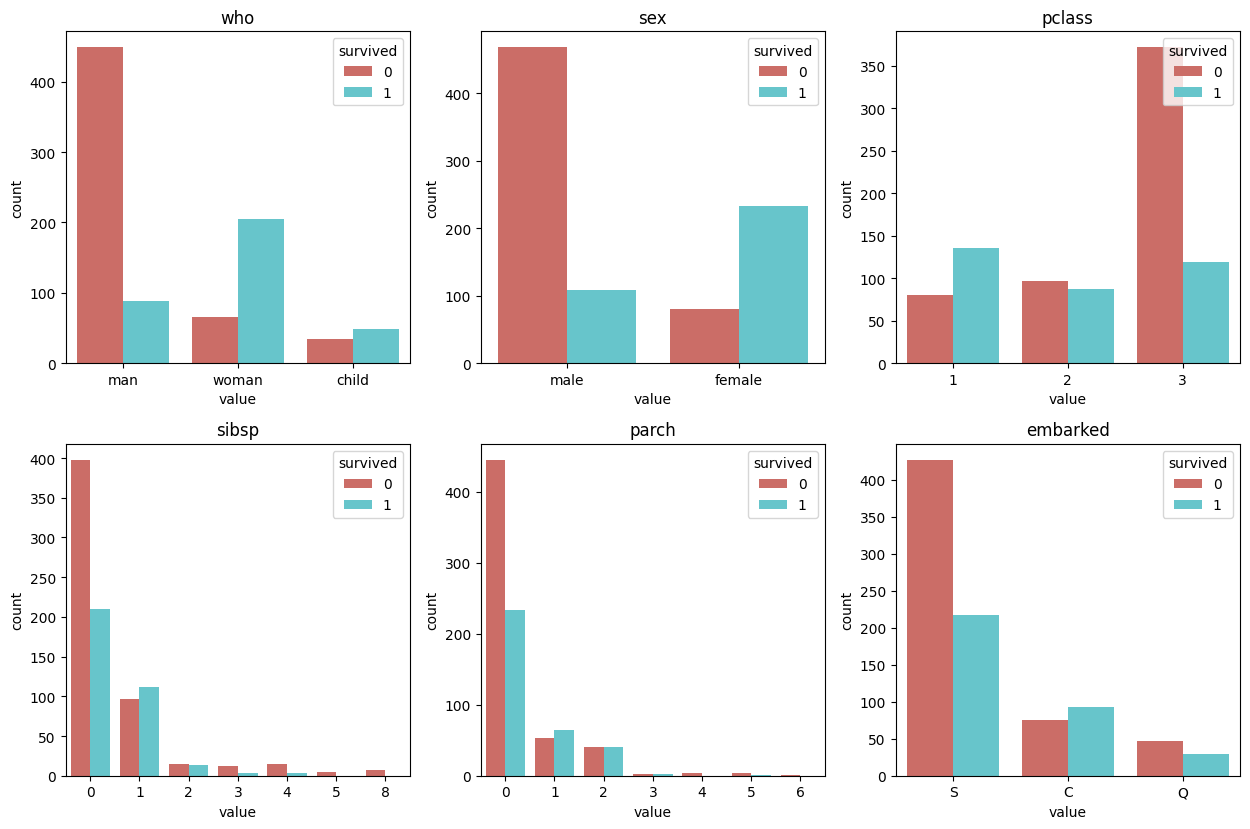

In [ ]:
''' visualizing the number of survivors with column names:
who
pclass
age
sibsp
parch
sex
and embarked'''



col = ['who', 'sex','pclass', 'sibsp', 'parch' ,'embarked']

nrows = 2
ncols = 3

# subplots
fig, axs= plt.subplots(nrows, ncols, figsize = (ncols* 4.2, nrows*  4.2))

for r in range(0, nrows):
  for c in range(0, ncols):
    i = r*ncols + c # indexing the number of columns

    ax = axs[r][c]

     # Use the melt function to reshape the data for the countplot
    melted_data = titanic.melt(id_vars=['survived'], value_vars=[col[i]])
    sns.countplot(x='value', hue='survived', data=melted_data, ax=ax, palette = 'hls')



    #giving graphs titles
    ax.set_title(col[i])
    ax.legend(title = 'survived', loc = 'upper right')

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

In [ ]:
#understanding the survival rates of each plot

titanic.groupby('who')['survived'].mean()


who
child    0.590361
man      0.163873
woman    0.756458
Name: survived, dtype: float64

In [ ]:
titanic.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [ ]:
titanic.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [ ]:
titanic.groupby('sibsp')['survived'].mean()

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64

In [ ]:
titanic.groupby('parch')['survived'].mean()

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64

In [ ]:
titanic.groupby('embarked')['survived'].mean()


embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64

In [ ]:
#observing survival rates simultaneously by category
titanic.groupby(['who', 'pclass'])['survived'].mean()

who    pclass
child  1         0.833333
       2         1.000000
       3         0.431034
man    1         0.352941
       2         0.080808
       3         0.119122
woman  1         0.978022
       2         0.909091
       3         0.491228
Name: survived, dtype: float64

<Axes: xlabel='who'>

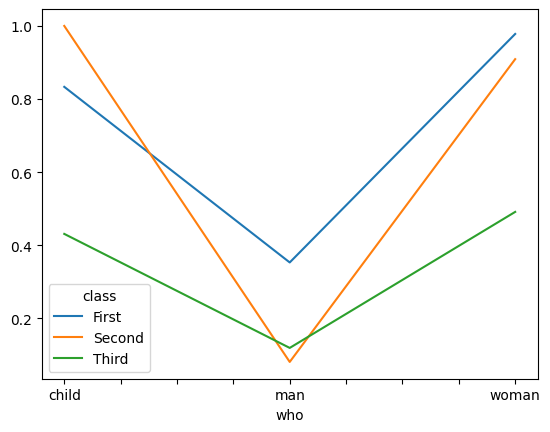

In [ ]:
titanic.pivot_table('survived', index = 'who', columns = 'class').plot()

In [ ]:
# it can be observed that a woman from 1st class had the best rate of survival
# and that a man of 3rd class had the least chance of survival

In [ ]:
titanic.groupby(['embarked', 'pclass'])['survived'].mean()

embarked  pclass
C         1         0.694118
          2         0.529412
          3         0.378788
Q         1         0.500000
          2         0.666667
          3         0.375000
S         1         0.582677
          2         0.463415
          3         0.189802
Name: survived, dtype: float64

In [ ]:
''' it can be observed that passengers who booked 1st class and were from
C had the best chance of survival'''

' it can be observed that passengers who booked 1st class and were from\nC had the best chance of survival'

<Axes: xlabel='embarked'>

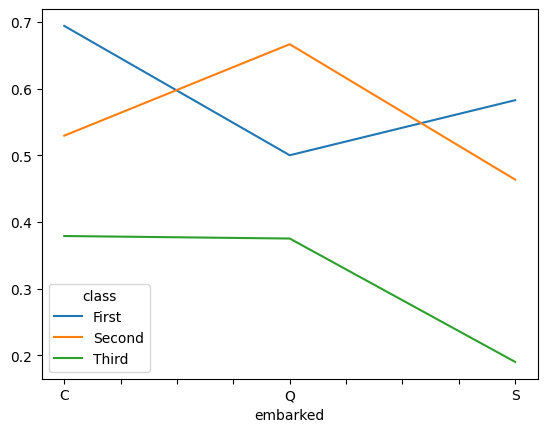

In [ ]:
titanic.pivot_table('survived', index = 'embarked', columns = 'class').plot()

In [ ]:
titanic.groupby(['sex', 'embarked'])['survived'].mean()

sex     embarked
female  C           0.876712
        Q           0.750000
        S           0.689655
male    C           0.305263
        Q           0.073171
        S           0.174603
Name: survived, dtype: float64

In [ ]:
# females from C had the best chance of survial as compared to males from Q

<Axes: xlabel='sex'>

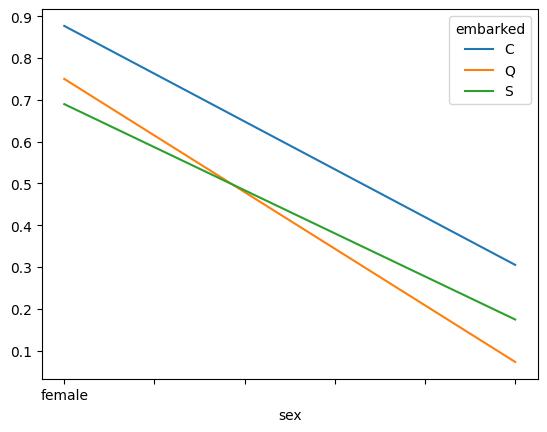

In [ ]:
titanic.pivot_table('survived', index = 'sex', columns = 'embarked').plot()

<ipython-input-27-330fa35a3a93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='who', y='survived', data=titanic, palette = 'hls')


<Axes: xlabel='who', ylabel='survived'>

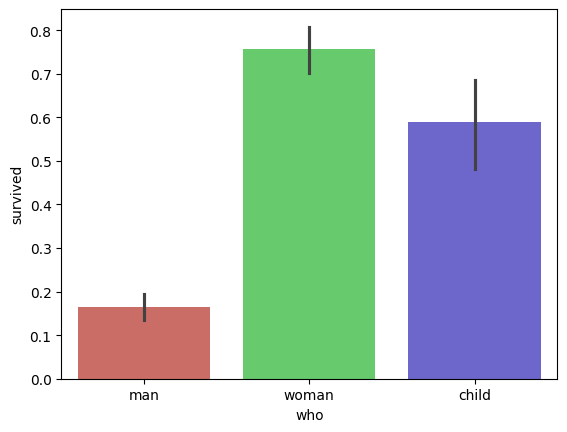

In [ ]:
#plotting categorically based on survival
#who
sns.barplot(x='who', y='survived', data=titanic, palette = 'hls')

<ipython-input-28-7656baa032b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=titanic, palette = 'hls')


<Axes: xlabel='sex', ylabel='survived'>

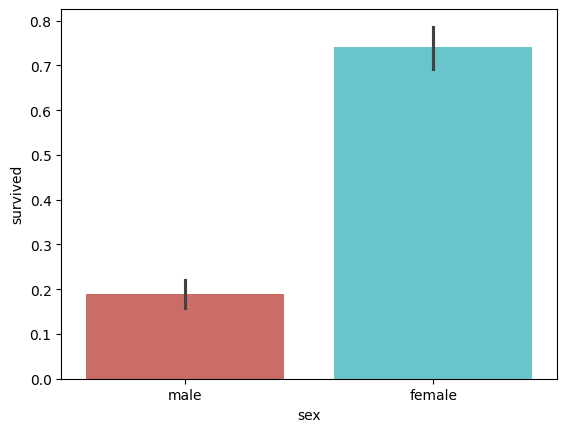

In [ ]:
#sex
sns.barplot(x='sex', y='survived', data=titanic, palette = 'hls')

<ipython-input-29-fb363ac2f410>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='survived', data=titanic, palette = 'hls')


<Axes: xlabel='class', ylabel='survived'>

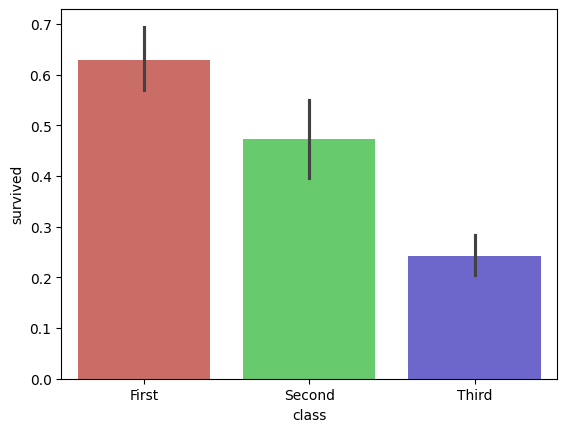

In [ ]:
#class
sns.barplot(x='class', y='survived', data=titanic, palette = 'hls')

<ipython-input-30-57d0bcd97f44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sibsp', y='survived', data=titanic, palette = 'hls')


<Axes: xlabel='sibsp', ylabel='survived'>

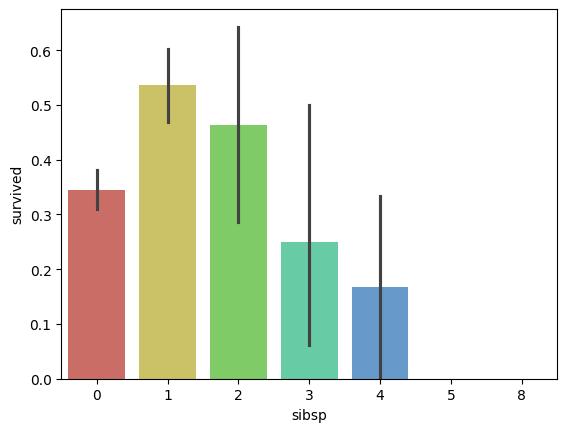

In [ ]:
#sibling/spouse
sns.barplot(x='sibsp', y='survived', data=titanic, palette = 'hls')

<ipython-input-31-00388830037d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parch', y='survived', data=titanic, palette = 'hls')


<Axes: xlabel='parch', ylabel='survived'>

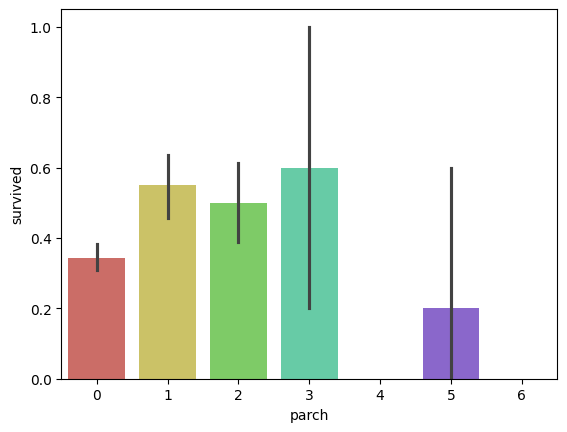

In [ ]:
#parent/child
sns.barplot(x='parch', y='survived', data=titanic, palette = 'hls')

<ipython-input-32-06c67cbff636>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embarked', y='survived', data=titanic, palette = 'hls')


<Axes: xlabel='embarked', ylabel='survived'>

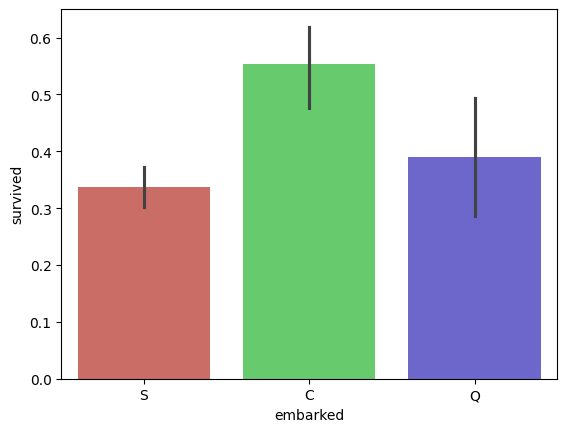

In [ ]:
#embarked
sns.barplot(x='embarked', y='survived', data=titanic, palette = 'hls')

In [ ]:
#looking at survival rate by sex, class and age

age= pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'pclass')

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [ ]:
#checking the same for fare wrt sex and age
titanic.pivot_table('survived', ['sex', age], 'fare')

fare             0.0000    4.0125    5.0000    6.2375    6.4375    6.4500    \
sex    age                                                                    
female (0, 18]        NaN       NaN       NaN       NaN       NaN       NaN   
       (18, 80]       NaN       NaN       NaN       NaN       NaN       NaN   
male   (0, 18]        NaN       NaN       NaN       NaN       NaN       NaN   
       (18, 80]  0.142857       0.0       0.0       0.0       0.0       0.0   

fare             6.4958    6.7500    6.9750    7.0458    ...  151.5500  \
sex    age                                               ...             
female (0, 18]        NaN       0.0       NaN       NaN  ...       0.0   
       (18, 80]       NaN       NaN       NaN       NaN  ...       0.5   
male   (0, 18]        0.0       NaN       NaN       NaN  ...       1.0   
       (18, 80]       0.0       0.0       0.5       0.0  ...       NaN   

fare             153.4625  164.8667  211.3375  211.5000  227.5250  247.5208  \
sex    age                                                                    
female (0, 18]        NaN       NaN       1.0       NaN       1.0       NaN   
       (18, 80]       1.0       1.0       1.0       NaN       1.0       1.0   
male   (0, 18]        NaN       NaN       NaN       NaN       NaN       NaN   
       (18, 80]       0.0       NaN       NaN       0.0       NaN       0.0   

fare             262.3750  263.0000  512.3292  
sex    age                                     
female (0, 18]        1.0       NaN       NaN  
       (18, 80]       1.0       1.0       1.0  
male   (0, 18]        NaN       NaN       NaN  
       (18, 80]       NaN       0.0       1.0  

[4 rows x 220 columns]

<Axes: xlabel='fare'>

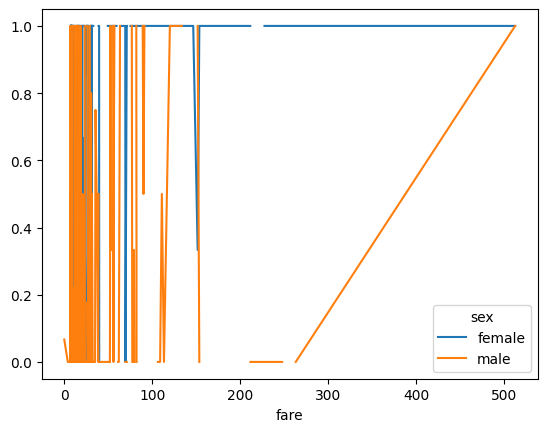

In [ ]:
titanic.pivot_table('survived', index = 'fare', columns = 'sex').plot()

In [ ]:
#counting the empty values in every column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
#observe the values of each column and get the sum of them individually

for valu in titanic:
  print(titanic[valu].value_counts())

survived
0    549
1    342
Name: count, dtype: int64
pclass
3    491
1    216
2    184
Name: count, dtype: int64
sex
male      577
female    314
Name: count, dtype: int64
age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64
sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64
embarked
S    644
C    168
Q     77
Name: count, dtype: int64
class
Third     491
First     216
Second    184
Name: count, dtype: int64
who
man      537
woman    271
child     83
Name: count, dtype: int64
adult_male
True     537
False    354
Name: count, dtype: int64

In [ ]:
#drop the columns that are redudant
titanic = titanic.dropna(subset= ['embarked', 'age'])

titanic = titanic.drop(['deck', 'embark_town', 'alive', 'who', 'alone', 'class','adult_male'], axis = 1)



In [ ]:
#counting the cleaned number of rows and columns
titanic.shape

(712, 8)

In [ ]:
#observing the remaining datatypes
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
#changing the datatype of the objects
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

titanic['sex'] = labelencoder.fit_transform(titanic['sex'])
titanic['embarked'] = labelencoder.fit_transform(titanic['embarked'])







In [ ]:
print(titanic['embarked'].unique())
print(titanic['sex'].unique())

[2 0 1]
[1 0]


In [ ]:
#checking data types again
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
#splitting the data into independent and dependent variables (M,N)
N = titanic.iloc[:, 0].values
M = titanic.iloc[:, 1:8].values


#splitting into 80%:20% for training to testing
from sklearn.model_selection import train_test_split
M_train, M_test, N_train, N_test = train_test_split(M, N, test_size = 0.2, random_state = 0)

In [ ]:
#scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
M_train = sc.fit_transform(M_train)
M_test = sc.transform(M_test)

In [ ]:
#creating a function with a variety of models

def models(M_train, N_train):

  #logistic regression
  #from sklearn.linear_model import LogisticRegression
  #log = LogisticRegression(random_state = 0)
  #log.fit(M_train, N_train)


  #using kneighbours

  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(M_train, N_train)


  #using svc linear kernel

  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(M_train, N_train)

  #using svc rbf kernel

  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(M_train, N_train)

  #using decision tree


  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(M_train, N_train)

  #using random forest

  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(M_train, N_train)


  #using gaussianNB

  #from sklearn.naive_bayes import GaussianNB
  #gauss = GaussianNB()
  #gauss.fit(M_train, N_train)

  #printing the accuracy of training for each model
  #print('[0]Logistic regression training accuracy: ', log.score(M_train, N_train))
  print('[1]KNN training accuracy: ', knn.score(M_train, N_train))
  print('[2]SVC linear training accuracy: ', svc_lin.score(M_train, N_train))
  print('[3]SVC rbf training accuracy: ', svc_rbf.score(M_train, N_train))
  print('[4]Decision tree training accuracy: ', tree.score(M_train, N_train))
  print('[5]Random forest training accuracy: ', forest.score(M_train, N_train))
  #print('[6]GaussianNB training accuracy: ', gauss.score(M_train, N_test))

  return  knn, svc_lin, svc_rbf, tree, forest



In [ ]:
#training the models

model = models(M_train, N_train)

[1]KNN training accuracy:  0.8664323374340949
[2]SVC linear training accuracy:  0.7768014059753954
[3]SVC rbf training accuracy:  0.8506151142355008
[4]Decision tree training accuracy:  0.9929701230228472
[5]Random forest training accuracy:  0.9753954305799648


In [ ]:
#using confusion matrix and accuracy for the models using test data

from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  cm = confusion_matrix(N_test, model[i].predict(M_test))



  #extracting TP, TN, FP, FN
  TN, FP, FN, TP = confusion_matrix(N_test, model[i].predict(M_test)).ravel()
  testscore = (TP + TN)/(TP + TN + FP + FN)


  #tp = cm[0][0]
  #tn = cm[1][1]
  #fp = cm[0][1]
  #fn = cm[1][0]


  print(cm)
  print('Model[{}] testing accuracy = "{}"'.format(i, testscore))
  print()

[[71 11]
 [20 41]]
Model[0] testing accuracy = "0.7832167832167832"

[[70 12]
 [18 43]]
Model[1] testing accuracy = "0.7902097902097902"

[[75  7]
 [22 39]]
Model[2] testing accuracy = "0.7972027972027972"

[[60 22]
 [10 51]]
Model[3] testing accuracy = "0.7762237762237763"

[[67 15]
 [13 48]]
Model[4] testing accuracy = "0.8041958041958042"



In [ ]:
#random forest has the best accuracy so far
#get importance of feature

forest = model[4]
importances = pd.DataFrame({'feature' : titanic.iloc[:, 1:8].columns, 'importance' : np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<Axes: xlabel='feature'>

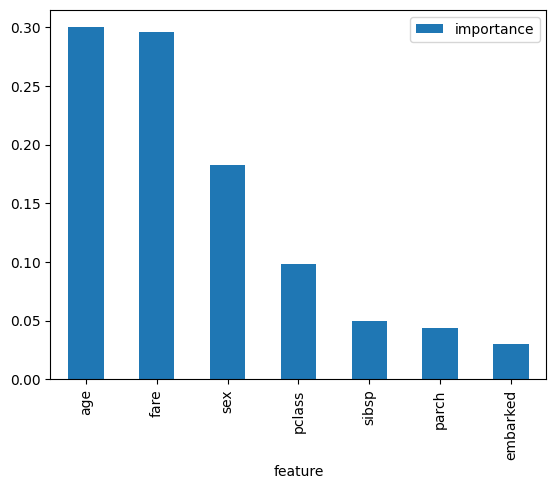

In [ ]:
#plotting the importances as bargraph
importances.plot.bar()

In [ ]:
#printing the prediction of the random forest classifier
predi = model[4].predict(M_test)
print(predi)

print()

#printing the actual values
print(N_test)

[1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:

'''pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64'''

my_surv = [[2, 0, 18, 0, 0, 0, 2]]
papa_surv = [[1, 0, 50, 0, 0, 0, 1]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
fitted = sc.fit(M_train)
my_surv_scaled = sc.transform(my_surv)
papa_surv_scaled = sc.transform(papa_surv)

#printing the prediction of my survival

predi = model[4].predict(papa_surv)

print(predi)

[0]
